# 잔차분석

## 잔차분석의 이해

### 잔차

실제 관측값과 예측값의 사이

즉, 예측값에 대한 오차를 의미함.

$잔차=실제관측값-예측값$

### 잔차분석

`회귀분석 수행 후` 회귀 분석이 적절하게 수행되었는지, `모델이 데이터에 적합한지를 평가`하기 위해 사용

<평가 대상> <br>
1.잔차의 선형성 <br>
2.잔차의 정규성 <br>
3.잔차의 등분산성 <br>
4.잔차의 독립성 <br>

## #01. 작업준비

### 패키지 참조

In [13]:
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import sys
import os
import statsmodels.api as sm
from statsmodels.stats.api import het_breuschpagan
from scipy import stats

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import my_ols

### 그래프 초기화

In [14]:
plt.rcParams['font.family'] = 'Apple Gothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] =  (10,5)
plt.rcParams['axes.unicode_minus'] = False

### 데이터 가져오기

In [8]:
df = read_excel("https://data.hossam.kr/E04/cars.xlsx")
df

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


### 회귀분석 수행

In [10]:
ols = my_ols(df, x='speed', y='dist')
ols.summary

['speed', 'dist']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           1.49e-12
Time:                        11:56:05   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## #02. 잔차분석 수행

### [방법1] 잔차 구하기 (실제관측값 - 예측값)

#### 예측값 도출하기

In [ ]:
# 회귀모델로 계산된 dist와 실제 dist비교해야 함.
# 예측된 y값 도출
y = ols.fit.predict(df['speed'])
y

### [방법2] 회귀분석 결과에 내장된 예측값
`predict()` 함수의 결과와 동일함

In [ ]:
y = ols.fit.fittedvalues
y

### [방법3] 직접계산하기

In [ ]:
residual = df['dist'] - y #실제관측값 - 예측값
residual

### [방법4] 회귀분석 결과에 내장된 잔차값

In [ ]:
residual = ols.fit.resid
residual

### 분석결과가 내장하고 있는 독립변수 데이터 셋

In [21]:
ols.fit.model.exog

array([[ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  7.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 11.],
       [ 1., 12.],
       [ 1., 12.],
       [ 1., 12.],
       [ 1., 12.],
       [ 1., 13.],
       [ 1., 13.],
       [ 1., 13.],
       [ 1., 13.],
       [ 1., 14.],
       [ 1., 14.],
       [ 1., 14.],
       [ 1., 14.],
       [ 1., 15.],
       [ 1., 15.],
       [ 1., 15.],
       [ 1., 16.],
       [ 1., 16.],
       [ 1., 17.],
       [ 1., 17.],
       [ 1., 17.],
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 19.],
       [ 1., 19.],
       [ 1., 19.],
       [ 1., 20.],
       [ 1., 20.],
       [ 1., 20.],
       [ 1., 20.],
       [ 1., 20.],
       [ 1., 22.],
       [ 1., 23.],
       [ 1., 24.],
       [ 1., 24.],
       [ 1., 24.],
       [ 1., 24.],
       [ 1., 25.]])

### 원본 데이터 프레임에 병합

In [22]:
df['예측값'] = y
df['잔차'] = residual
df.head()

,speed,dist,예측값,잔차
0,4,2,-1.849460,3.849460
1,4,10,-1.849460,11.849460
2,7,4,9.947766,-5.947766
3,7,22,9.947766,12.052234
4,8,16,13.880175,2.119825


*******

## 잔차의 선형성 
### 잔차의 선형성 시각화

- 모든 예측값에서 가운데 점선에 맞추어 잔차가 비슷하게 있어야 한다.
- 빨간 실선은 잔차의 추세를 의미
- 빨간 실선이 점선에서 크게 벗어난다면 잔차가 크게 달라진다는 의미이므로 선형성이 없다는 의미


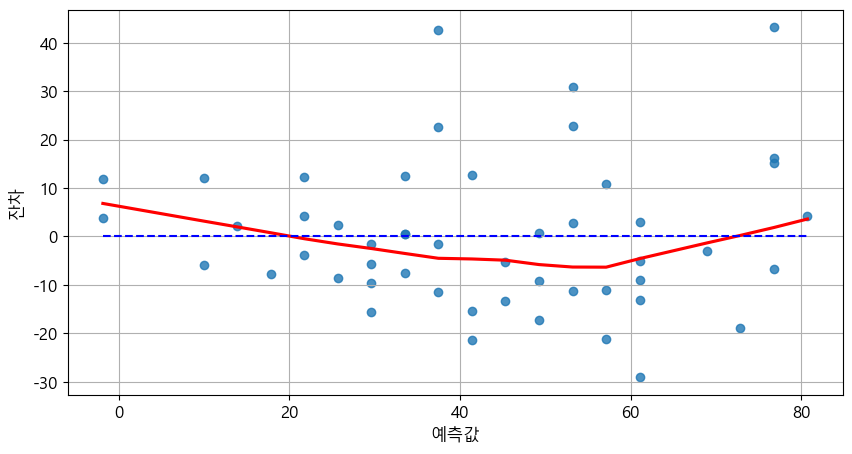

In [23]:
# 추세선의 기본은 무조건 직선 -> 따라서 파라미터 추가 lowess=True : 곡선형태로 출력된다. 
# 옆으로 길어질 수록 선형성 판단하기 어려워진다. 따라서 회귀분석에서 선형성 판단에 있어서 시각화는 잘 쓰이지 않는다. 
# 그래서 ! scipy 패키지
xmin = df['예측값'].min()
xmax = df['예측값'].max()
xrange = [xmin, xmax]
yrange = [0,0]

plt.figure()
sb.regplot(data=df, x='예측값', y='잔차', lowess=True, line_kws={'color':'red'})
sb.lineplot(x=xrange, y=yrange, color='blue', linestyle='--')
plt.grid()
plt.show()
plt.close()

## 잔차의 정규성(Q-Qplot, shapiro검정, )

- 잔차가 정규분포를 따르는지를 확인

### 잔차의 정규성 시각화

- Q-Q plot으로 확인
- 잔차가 정규분포를 따르면 Q-Q plot에서 점들이 점선에 따라 배치된다. 
- 구해 놓은 예측값을 활용하여 z-score 값을 구한다. 

#### zscore 구하기

In [24]:
df['zscore'] = stats.zscore(df['예측값'])
df.head()

,speed,dist,예측값,잔차,zscore
0,4,2,-1.849460,3.849460,-2.177858
1,4,10,-1.849460,11.849460,-2.177858
2,7,4,9.947766,-5.947766,-1.604738
3,7,22,9.947766,12.052234,-1.604738
4,8,16,13.880175,2.119825,-1.413697


### Q-Q plot 그리기

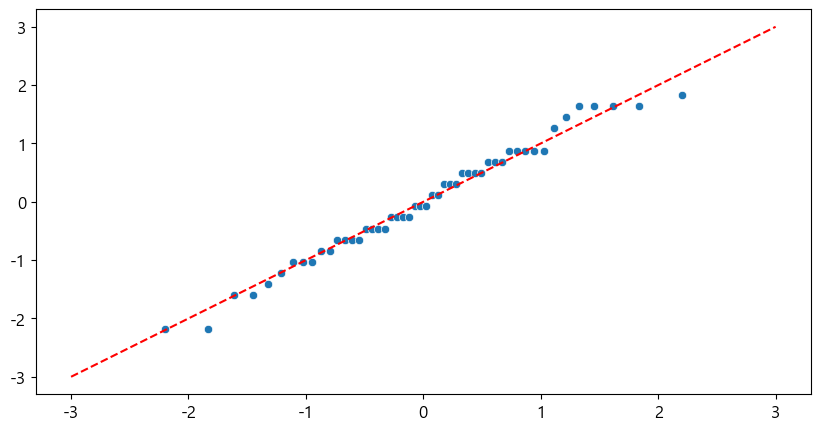

In [25]:
# 그래프의 점선에서 벗어나면 정규성이 떨어진다는 것. 
# 잔차의 정규성은 shapiro검정을 통해 알 수 있다. 

(x,y),_ = stats.probplot(df['zscore'])

sb.scatterplot(x=x, y=y)
sb.lineplot(x=[-3,3], y=[-3,3], color='red', linestyle='--')
plt.show()
plt.close()

#### 잔차도

잔차가 정규분포를 따른다면 대략적으로..

- $\pm\sqrt(MSE)$ 범위 안에 최소 `68%`의 잔차가 포함된다.
- $\pm2\sqrt(MSE)$ 범위 안에 최소 `95%`의 잔차가 포함된다.
- $\pm3\sqrt(MSE)$ 범위 안에 최소 `99%`의 잔차가 포함된다.

In [29]:
MSE_sq = np.sqrt(ols.fit.mse_resid)
r = ols.fit.resid

r1 = r[ (r > -MSE_sq) & (r < MSE_sq)].count() / r.count() * 100
r2 = r[ (r > -2*MSE_sq) & (r < 2*MSE_sq)].count() / r.count() * 100
r3 = r[ (r > -3*MSE_sq) & (r < 3*MSE_sq)].count() / r.count() * 100

mse_r = [r1, r2, r3]

print(f"루트 1MSE 구간에 포함된 잔차 비율 : {r1 : 1.2f}%")
print(f"루트 2MSE 구간에 포함된 잔차 비율 : {r2 : 1.2f}%")
print(f"루트 3MSE 구간에 포함된 잔차 비율 : {r3 : 1.2f}%")

루트 1MSE 구간에 포함된 잔차 비율 :  74.00%
루트 2MSE 구간에 포함된 잔차 비율 :  94.00%
루트 3MSE 구간에 포함된 잔차 비율 :  100.00%


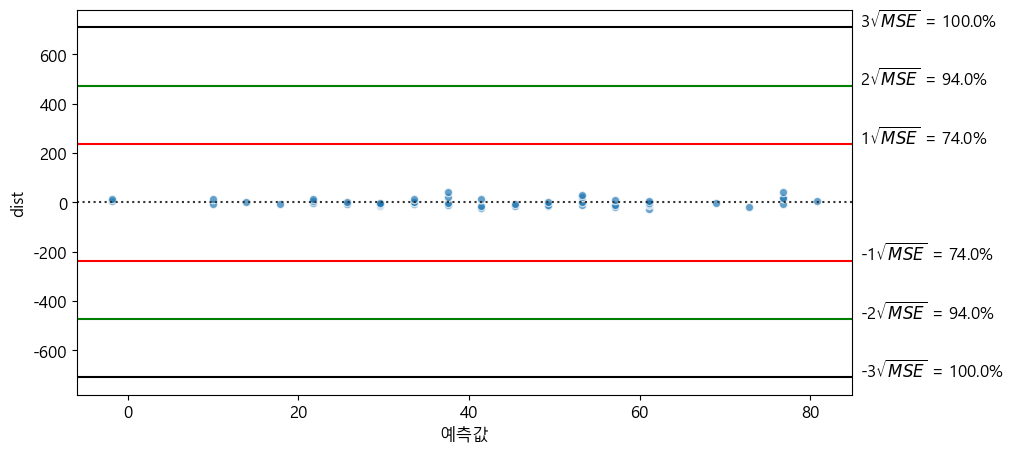

In [32]:
mse_sq = ols.fit.mse_resid

# 예측값과 실제값간의 잔차를 구해서 표시해주는 그래프
sb.residplot(data=df, x='예측값', y='dist', scatter_kws={'edgecolor':'white','alpha':0.7})

for i, c in enumerate(['red','green','black']):
    plt.axhline((i+1) * mse_sq, color=c)
    plt.axhline(-(i+1) * mse_sq, color=c)

# 현재 표시되는 그래프의 x축 범위를 가져온다.
xmin, xmax = plt.xlim()

for i, c in enumerate(['red','green','black']):
    plt.text(s=f"{i+1}"r'${}\sqrt{MSE}$ = %s%%' % mse_r[i], x=xmax+1, y=(i+1)*mse_sq)
    plt.text(s=f"-{i+1}"r'${}\sqrt{MSE}$ = %s%%' % mse_r[i], x=xmax+1, y=-(i+1)*mse_sq)

plt.show()
plt.close()


#### 샤피로 검정을 통한 정규성 검정

|가설|내용|
|----|---|
|귀무가설|표본의 모집단이 정규분포를 따름|
|대립가설|표본의 모집단이 정규분포를 따르지 않음|

In [33]:
s, p = stats.shapiro(df['잔차'])
print("Shapiro-Wilk Test: (통계량, p-value) = ", (s,p))

"잔차가 정규성을 따름" if p > 0.05 else '잔차가 정규성을 따르지 않음'

Shapiro-Wilk Test: (통계량, p-value) =  (0.9450908899307251, 0.02152523212134838)


'잔차가 정규성을 따르지 않음'

## 잔차의 등분산성 

- 회귀모형을 통해 예측된 모든 값들에 대하여 잔차의 분산이 동일하다는 가정

In [ ]:
sb.regplot(x=df['예측값'], y=np.sqrt(np.abs(df['잔차'])), lowess=True, line_kws={'color': 'red'})
plt.grid()
plt.show()
plt.close()

### 브로이슈-패건 검정

|가설|설명|
|---|---|
|귀무가설|등분산성 가정이 만족된다 (오차의 분산은 독립변수들과 관련이 없다.)|
|대립가설|등분산성 가정이 만족되지 않는다 (오차의 분산은 독립변수들과 관련이 있다.)|

In [26]:
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test_result = het_breuschpagan(ols.fit.resid, ols.fit.model.exog)
DataFrame(test_result, index=names)

,0
Lagrange multiplier statistic,3.214880
p-value,0.072972
f-value,3.298361
f p-value,0.075597


## 잔차의 독립성

회귀분석 결과표 하단의 Dubin-Watson 값을 확인한다. 

|수치|해석|
|--|---|
|`0`| 잔차들이 양의 상관관계 (독립성 'X')|
|`2`| 잔차들이 독립|
|`4`| 잔차들이 음의 상관관계 (독립성 'X')|

일반적으로 DW값이 `1.5 ~ 2.5`범위 내에 있으면 독립으로 판정


In [27]:
ols.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           1.49e-12
Time:                        11:56:05   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""